In [3]:
# loading required libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# reading input data
d = pd.read_csv('mpi_roof.csv',encoding='unicode_escape')
d.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2024 00:10:00,979.65,7.63,282.43,2.83,71.53,10.47,7.49,2.98,4.77,...,3.37,5.04,209.0,0.0,0.0,0.0,0.0,0.0,15.38,428.8
1,01.01.2024 00:20:00,979.56,7.63,282.45,2.76,71.18,10.47,7.45,3.02,4.75,...,2.63,4.50,204.5,0.0,0.0,0.0,0.0,0.0,15.42,428.1
2,01.01.2024 00:30:00,979.51,7.56,282.37,2.66,71.00,10.42,7.40,3.02,4.71,...,3.48,6.96,208.1,0.0,0.0,0.0,0.0,0.0,15.47,428.3
3,01.01.2024 00:40:00,979.43,7.51,282.33,2.59,70.91,10.38,7.36,3.02,4.69,...,3.73,5.13,201.8,0.0,0.0,0.0,0.0,0.0,15.52,427.8
4,01.01.2024 00:50:00,979.35,7.42,282.25,2.51,70.93,10.32,7.32,3.00,4.66,...,3.06,4.21,198.6,0.0,0.0,0.0,0.0,0.0,15.53,428.0


In [64]:
# selecting wind speed data (first 1000 samples)
target = d['wv (m/s)'].iloc[:500]

In [65]:
# ARMA and ARIMA modeling test

# ARMA with AR degree 5 and MA degree 1
arma = ARIMA(target,order=(5,0,1))
# ARIMA with AR degree 5 and MA degree 1 and difference degree 1
arima = ARIMA(target,order=(5,1,1))

arma_fit = arma.fit()
arima_fit = arima.fit()

C:\Users\Fani\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
# model summaries
print(f'ARMA model summary is: \n {arma_fit.summary()}\n\n\n\n  ')
print(f'AIRMA model summary is: \n {arima_fit.summary()}')

ARMA model summary is: 
                                SARIMAX Results                                
Dep. Variable:               wv (m/s)   No. Observations:                  500
Model:                 ARIMA(5, 0, 1)   Log Likelihood                -586.135
Date:                Tue, 22 Oct 2024   AIC                           1188.269
Time:                        10:59:27   BIC                           1221.986
Sample:                             0   HQIC                          1201.500
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1220      0.392     10.507      0.000       3.353       4.891
ar.L1          1.3820      0.428      3.229      0.001       0.543       2.221
ar.L2         -0.4702      

In [67]:
# ARMA and ARIMA model's MSE
print(f'ARMA model MSE is: \n {arma_fit.mse}\n\n')
print(f'ARIMA model MSE is: \n {arima_fit.mse}')

ARMA model MSE is: 
 0.6096418600248087


ARIMA model MSE is: 
 0.6358525398041002


In [68]:
# train test splitting for doing forecasting
ind = int(np.floor(0.66*len(target)))
train_data = target.iloc[:ind].values
test_data = target.iloc[ind:].values

In [69]:
# one sample ahead forecasting over data with ARMA and ARIMA

# ARMA forecasting
predictions_arma = []
train_data1 = list(train_data)
for i in range(len(test_data)):
    arma = ARIMA(train_data1,order=(5,0,1))
    arma_fit = arma.fit()
    pred = arma_fit.forecast()
    predictions_arma.append(pred)
    train_data1.append(test_data[i])
    train_data1 = train_data1[1:]

# ARIMA forecasting
predictions_arima = []
train_data2 = list(train_data)
for i in range(len(test_data)):
    arima = ARIMA(train_data2,order=(5,1,1))
    arima_fit = arima.fit()
    pred = arima_fit.forecast()
    predictions_arima.append(pred)
    train_data2.append(test_data[i])
    train_data2 = train_data2[1:]

C:\Users\Fani\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Fani\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Fani\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Fani\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Fani\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Lik

C:\Users\Fani\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Fani\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Fani\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Fani\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Fani\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Lik

In [55]:
# ARMA and ARIMA forecasting MSE
print(f'ARMA forecasting MSE is: \n {mean_squared_error(predictions_arma,test_data)}\n\n')
print(f'ARIMA forecasting MSE is: \n {mean_squared_error(predictions_arima,test_data)}')

ARMA forecasting MSE is: 
 0.6717516829719122


ARIMA forecasting MSE is: 
 0.6181899396828712


Text(0.5, 1.0, 'ARIMA forecasting')

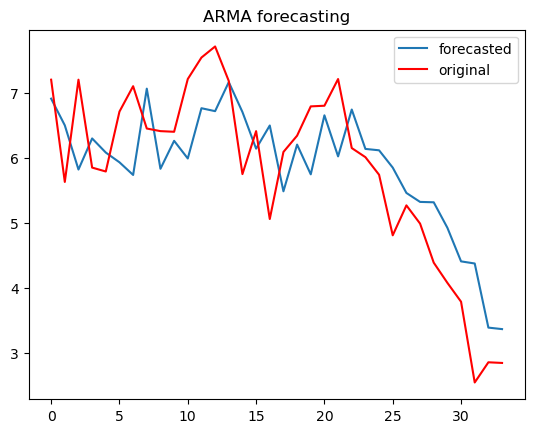

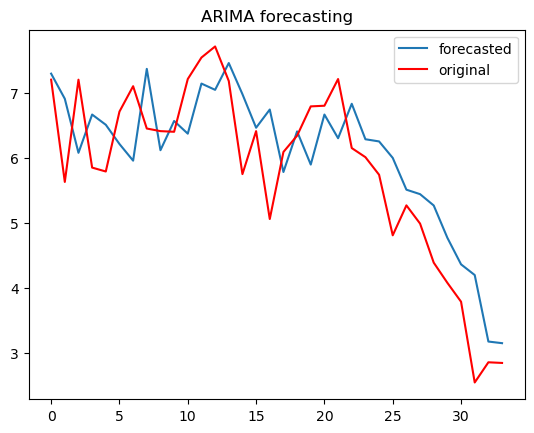

In [63]:
# plotting original and predicted data
plt.figure()
plt.plot(predictions_arma,label='forecasted')
plt.plot(test_data,'r',label='original')
plt.legend()
plt.title('ARMA forecasting')

plt.figure()
plt.plot(predictions_arima,label='forecasted')
plt.plot(test_data,'r',label='original')
plt.legend()
plt.title('ARIMA forecasting')